# Nearest Neighbour algorithm and conformal predictor

Importing libraries

In [1]:
import numpy as np
from math import sqrt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from operator import itemgetter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
import math

Loading the required datasets for iris and ionosphere. Since we are using the genfromtxt function, it is important we use names=True to automatically assign the first column values as the header and dtype=none for automatic assignmnet of each column to the right data type as not all columns in the data are of the same data type. A more efficient way would have been to assign the data types instead of setting none. I noticed trailing white spaces after printing the imported data so i went back to set autostrip=true to trim all white spaces.

In [2]:
ionosphereData= np.genfromtxt("Desktop/MSC/datasets/ionosphere.txt", delimiter=",",usecols=np.arange(34))
ionosphereLabel = np.genfromtxt("Desktop/MSC/datasets/ionosphere.txt", delimiter=',', usecols=34, dtype='int')
irisData = load_iris().data
irisLabel = load_iris().target

In [3]:
print(ionosphereData.shape)
print(ionosphereLabel.ndim)

(351, 34)
1


Splitting the data sets into test and train samples at random with train_test_split

In [4]:
irisDataTrain, irisDataTest, irisLabelTrain, irisLabelTest = train_test_split(irisData,irisLabel, random_state = 295)
ionosphereDataTrain,ionosphereDataTest,ionosphereLabelTrain,ionosphereLabelTest = train_test_split(ionosphereData,ionosphereLabel, random_state = 295)

In [5]:
print(irisDataTrain.ndim)
print(irisDataTest.size)
print(ionosphereLabelTest.shape)

2
152
(88,)


In [6]:
print(ionosphereDataTrain.ndim)
print(ionosphereDataTest.shape)


2
(88, 34)


# Creating a function to calculate euclidean distance for the NN1 Classifier

In [7]:
def euclideanDistance(firstrow, secondrow):
    distance = 0.0
    for i in range((firstrow)-1):
        distance += pow(row1[i] - row2[i], 2)
    return sqrt(distance)

# def getParticulardistance(training_instance, test_instance):
#     return (training_instance, euclideanDistance(test_instance, training_instance[0]))

# Creating a K Nearest Neighbour method to get the nearest neigbour. K will be dynamic but our interest is in Nearest Neighbour, therefore K=1

In [8]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclideanDistance(test_row, train_row)
        distances.append((train_row, dist))
    #distances.sort(key=lambda tup: tup[1])
    sorted_distance= sorted(distances,key=itemgetter(1))
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(sorted_distance[i][0])
    return neighbors

Getting the nearest neigbour for iris train set

In [9]:
Irisneighbors = get_neighbors(irisDataTrain, irisLabelTrain[0], 1)
for neighbor in Irisneighbors:
    print(Irisneighbors)

[array([5.6, 2.7, 4.2, 1.3])]


Getting the nearest neigbour for ionosphere train set

In [10]:
Iononeighbors = get_neighbors(ionosphereDataTrain, ionosphereLabelTrain[0], 1)
for neighbor in Iononeighbors:
    print(neighbor)

[ 1.       0.       0.68729  1.       0.91973 -0.76087  0.81773  0.04348
  0.76087  0.10702  0.86789  0.73746  0.70067  0.18227  0.7592   0.13712
  0.93478 -0.25084  0.70736  0.18729  0.64883  0.24582  0.60201  0.77425
  1.      -0.53846  0.89262  0.22216  0.7107   0.53846  1.      -0.06522
  0.56522  0.23913]


We can make a prediction by taking the most similar neighbors collected from the training set with the max function.

In [11]:
def predict(train, test_row, neighbourType):
    output_values = [row[-1] for row in neighbourType]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

Running prediction for Ionosphere Data

In [12]:
prediction = predict(ionosphereDataTrain, ionosphereLabelTrain[0], Iononeighbors)
print('Expected %d, Got %d.' % (ionosphereDataTrain[0][-1], prediction))

Expected 0, Got 0.


Running prediction for Iris Data

In [13]:
prediction = predict(ionosphereDataTrain, ionosphereLabelTrain[0], Irisneighbors)
print('Expected %d, Got %d.' % (irisDataTrain[0][-1], prediction))

Expected 1, Got 1.


In [14]:
accuracy = np.mean(prediction == ionosphereDataTrain[0][-1])
print("accuracy is: ",accuracy*100)
print(irisDataTrain.shape)


accuracy is:  0.0
(112, 4)


To get the conformity score, we need to get the distance to the nearest sample of the same of a different class and for the same class

In [15]:
def conformityDistance(X, Y, size):
    length = size
    distanceofmemberClass, distanceofotherClass = [[math.inf for i in range(length)] for j in range(2)]

    for i in range(length-1):
        for j in range(i+1,length):
            distance=np.sqrt(np.sum(np.square(X[i]-X[j])))

            if Y[i]==Y[j]:
                if distance < distanceofmemberClass[i]:
                    distanceofmemberClass[i] = distance
                if distance < distanceofmemberClass[j]:
                    distanceofmemberClass[j] = distance
            else:
                if distance < distanceofotherClass[i]:
                    distanceofotherClass[i] = distance
                if distance < distanceofotherClass[j]:
                    distanceofotherClass[j] = distance

                          
    return [distanceofmemberClass, distanceofotherClass]


Conformity Distance for Iris Train

[[0.17320508075688815, 0.4898979485566356, 0.24494897427831766, 0.2449489742783171, 0.09999999999999964, 0.22360679774997858, 0.24494897427831785, 0.31622776601683794, 0.22360679774997877, 0.1999999999999993, 0.2828427124746193, 0.5196152422706631, 0.24494897427831838, 0.14142135623730928, 0.14142135623730986, 0.33166247903554, 0.6324555320336759, 0.26457513110645964, 0.10000000000000053, 0.282842712474619, 0.22360679774997871, 0.22360679774997827, 0.14142135623730953, 0.42426406871192884, 0.24494897427831838, 0.38729833462074165, 0.43588989435406716, 0.34641016151377513, 0.2449489742783171, 0.24494897427831766, 0.31622776601683766, 0.34641016151377513, 0.10000000000000053, 0.2999999999999997, 0.14142135623730917, 0.26457513110645914, 0.3000000000000001, 0.19999999999999973, 0.1414213562373093, 0.1414213562373093, 0.14142135623730928, 0.1414213562373093, 0.3605551275463988, 0.45825756949558427, 0.31622776601683766, 0.24494897427831766, 0.0, 0.3872983346207414, 0.22360679774997896, 0.14

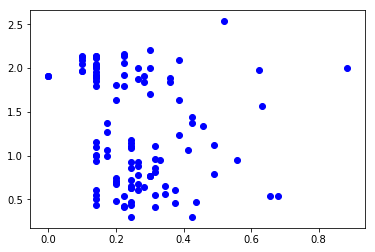

In [16]:
conformitydistanceIris= conformityDistance(irisDataTrain,irisLabelTrain,irisDataTrain.shape[0])
plot.scatter(conformitydistanceIris[0],conformitydistanceIris[1],color='blue')  
print(conformitydistanceIris)


Conformity Distance for Ionosphere Train


[[2.4030222896594196, 0.9617086603020688, 1.0270924460339488, 0.786147468481582, 0.44904963834747713, 1.9326678731225393, 0.5904281853875204, 2.4012062485134424, 0.5682970319296063, 1.7847512954190563, 1.2940086431318765, 2.362348149257429, 3.747670092871036, 0.6864146262282004, 0.7795736618177912, 1.2456731379459058, 0.7130875355803101, 2.0845411862565824, 0.38132906760434615, 0.0999649758665504, 0.4571554999122289, 0.9077003810729618, 1.0245765270588625, 0.7334697605218637, 2.747233987813925, 0.7384396313172797, 2.369978680368243, 4.217331201565749, 0.38811287468982525, 3.3662526261259718, 0.3839881887506438, 0.8279859590596933, 3.6997409494584885, 0.20386311927369308, 0.0999649758665504, 1.8625259423159721, 0.49473457863787934, 2.9013132908047004, 0.21487105342507173, 0.278390669024664, 1.4454039214351124, 3.3148877509351653, 0.2598264965318202, 1.7879053008478945, 4.7783896672937844, 0.5563781221435652, 3.4641016151377544, 2.619168730227207, 0.1842364279940316, 0.916406303775787, 0

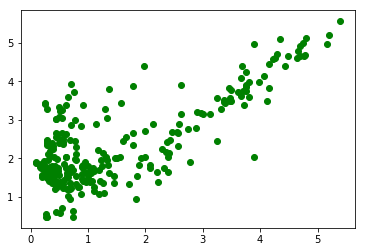

In [17]:
conformitydistanceIono= conformityDistance(ionosphereDataTrain,ionosphereLabelTrain,ionosphereDataTrain.shape[0])
plot.scatter(conformitydistanceIono[0],conformitydistanceIono[1],color='green')  
print(conformitydistanceIono)

Getting the test error rates and false p-value for both data sets

In [27]:
def conformal(same_class_dist,other_class_dist,testData,trainLabel,trainData,testLabel,currentData):
    predicted_list, p_values = [[] for i in range(2)]
    lenrange = len(list(set(trainLabel)))

    for i in range(len(testData)):
        conformity_scores = [[] for j in range(lenrange)]
        curr_testXval = testData[i]
        for j in range(lenrange):
            new_same_dist = np.append(same_class_dist, math.inf)
            new_other_class_dist = np.append(other_class_dist, math.inf)
            extended_X = np.concatenate((trainData, [curr_testXval]), axis = 0)
            extended_y = np.concatenate((trainLabel, [j]), axis = 0)

            for curr_idx, curr_elem in enumerate(extended_X):
                distance = np.linalg.norm(curr_elem - curr_testXval)
                idx = len(extended_X)-1

                if distance != 0: 
                    if j == extended_y[curr_idx]:
                        if distance < new_same_dist[idx]:
                            new_same_dist[idx] = distance
                    else:
                        if distance < new_other_class_dist[idx]:
                            new_other_class_dist[idx] = distance

                if new_same_dist[curr_idx] == 0:
                    conformity_scores[j].append(0)
                else:
                    conformity_scores[j].append(new_other_class_dist[curr_idx]/new_same_dist[curr_idx])

        p_vals = []
        for k in range(lenrange):
            p_vals.append(np.mean(conformity_scores[k]<=conformity_scores[k][trainData.shape[0]]))

        predicted_list.append(p_vals.index(max(p_vals)))
        p_values.append(p_vals)

    falsep = []
    for i, p in enumerate(p_values):
        sumval = 0;
        for j, q in enumerate(p):
            if j != testLabel[i]:
                sumval += q
        falsep.append(sumval)

    false_p_value = np.sum(falsep)/(len(falsep)*2)
    accuracy = np.mean(predicted_list == testLabel)
    print("For {}, "
          "The average false p-value : {} \n"
          "The test error rate is : {} \n"
          "The prediction accuracy : {} \n"
          .format(currentData, false_p_value, 1-accuracy,accuracy))


False P-value for Iris, accuracy and test error rate

In [28]:
mainConformal= conformal(conformitydistanceIris[0],conformitydistanceIris[1],irisDataTest,irisLabelTrain,irisDataTrain,irisLabelTest,'Iris')

TypeError: _append_dispatcher() missing 1 required positional argument: 'values'

False P-value for Ionosphere, accuracy and test error rate

In [26]:
mainConformal= conformal(conformitydistanceIono[0],conformitydistanceIono[1],ionosphereDataTest,ionosphereLabelTrain,ionosphereDataTrain,ionosphereLabelTest,'Ionosphere')

For Ionosphere, The average false p-value : 0.027935606060606067 
The test error rate is : 0.36363636363636365 
The prediction accuracy : 0.6363636363636364 

